In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [3]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [4]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [5]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [6]:
#Description
data.describe()
df=data

In [7]:
df.count() #number of values in col

id                     2870
region                 2870
latitude               2870
longitude              2870
accommodation_type     2870
cost                   2870
minimum_nights         2870
number_of_reviews      2870
reviews_per_month      2194
owner_id               2870
owned_hotels           2870
yearly_availability    2870
dtype: int64

In [8]:
#This tells us how big of an impact missing values have per col
temp = (df.isnull().sum() / len(df)) * 100
temp = temp.drop(temp[temp == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :temp})
missing_data

,Missing Ratio
reviews_per_month,23.554007


In [9]:
df.isnull().sum() #number of null or missing values 

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

In [10]:
df[df['number_of_reviews']==0].count() #double check that no other value is missing

id                     676
region                 676
latitude               676
longitude              676
accommodation_type     676
cost                   676
minimum_nights         676
number_of_reviews      676
reviews_per_month        0
owner_id               676
owned_hotels           676
yearly_availability    676
dtype: int64

In [11]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0) #replace NaN with 0

In [12]:
df[df['number_of_reviews']==0].count() #no more missing values

id                     676
region                 676
latitude               676
longitude              676
accommodation_type     676
cost                   676
minimum_nights         676
number_of_reviews      676
reviews_per_month      676
owner_id               676
owned_hotels           676
yearly_availability    676
dtype: int64

In [13]:
df=pd.get_dummies(df) #converts all categorical variables to numeric
df.drop(['yearly_availability'], axis=1, inplace=True) #drop the label column so nothing can accidently be changes
df.head()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,13232,40.71854,-74.00439,170,5,7,0.56,929983,1,0,0,1,0,0,1,0,0
1,246,40.64446,-73.95030,65,3,238,2.30,281764,1,0,1,0,0,0,1,0,0
2,19091,40.78573,-73.81062,85,1,0,0.00,19923341,1,0,0,0,1,0,0,1,0
3,34305,40.73863,-73.98002,210,30,0,0.00,200380610,65,0,0,1,0,0,0,1,0
4,444,40.82426,-73.94630,75,3,38,0.42,745069,3,0,0,1,0,0,0,0,1




**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


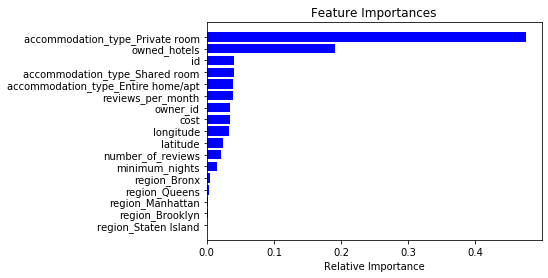

In [14]:
#This is how I get the feature importance: via random forest regressor
model = RandomForestRegressor(random_state=1)
model.fit(df,data.yearly_availability)
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The above graph showcases the top 20 features based on their importance factor. Having a private room tops the chart while the distinct NY regions are at the bottom of the graph. 

In [15]:
df.head() #all numeric data set

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,13232,40.71854,-74.00439,170,5,7,0.56,929983,1,0,0,1,0,0,1,0,0
1,246,40.64446,-73.95030,65,3,238,2.30,281764,1,0,1,0,0,0,1,0,0
2,19091,40.78573,-73.81062,85,1,0,0.00,19923341,1,0,0,0,1,0,0,1,0
3,34305,40.73863,-73.98002,210,30,0,0.00,200380610,65,0,0,1,0,0,0,1,0
4,444,40.82426,-73.94630,75,3,38,0.42,745069,3,0,0,1,0,0,0,0,1


Now, I will drop the region_* columns

In [16]:
df.drop(["region_Bronx","region_Brooklyn","region_Manhattan","region_Queens","region_Staten Island"], axis=1, inplace=True)
df.head()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,13232,40.71854,-74.00439,170,5,7,0.56,929983,1,1,0,0
1,246,40.64446,-73.95030,65,3,238,2.30,281764,1,1,0,0
2,19091,40.78573,-73.81062,85,1,0,0.00,19923341,1,0,1,0
3,34305,40.73863,-73.98002,210,30,0,0.00,200380610,65,0,1,0
4,444,40.82426,-73.94630,75,3,38,0.42,745069,3,0,0,1


I checked the skewness of cost and minimum nights because having a low skew value is better when training a model. I ignored the rest of the columns because they either had zeros or were numeric-label variables. 

Skewness: 13.007763


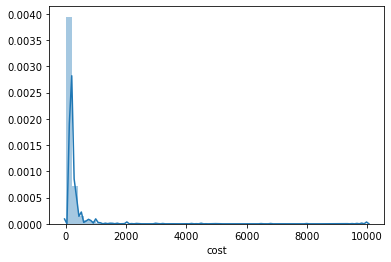

In [17]:
sns.distplot(df['cost']);
print("Skewness: %f" % df['cost'].skew())

13 is a high skew value, so I took the log to reduce that value.

Skewness: 0.865463


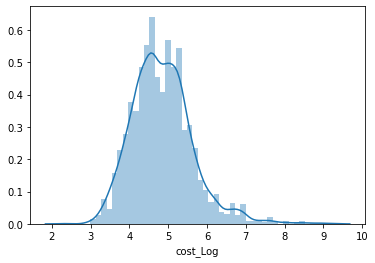

In [18]:
df['cost_Log'] = np.log(df['cost']) #new feature
sns.distplot(df['cost_Log']);
print("Skewness: %f" % df['cost_Log'].skew())
# df.drop(['cost'], axis=1, inplace=True)

Skewness: 11.868854


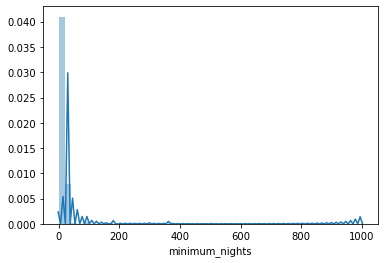

In [19]:
sns.distplot(df['minimum_nights']);
print("Skewness: %f" % df['minimum_nights'].skew())

11 is also a high value, so I took the log of all the values in the minimum_nights column

Skewness: 1.089872


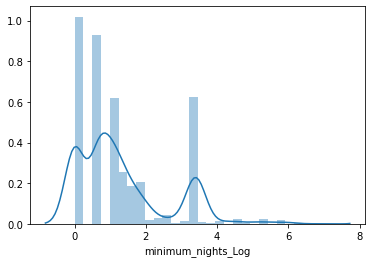

In [20]:
df['minimum_nights_Log'] = np.log(df['minimum_nights']) #new feature
sns.distplot(df['minimum_nights_Log']);
print("Skewness: %f" % df['minimum_nights_Log'].skew())
# df.drop(['minimum_nights'], axis=1, inplace=True)

In [21]:
df.head()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room,cost_Log,minimum_nights_Log
0,13232,40.71854,-74.00439,170,5,7,0.56,929983,1,1,0,0,5.135798,1.609438
1,246,40.64446,-73.95030,65,3,238,2.30,281764,1,1,0,0,4.174387,1.098612
2,19091,40.78573,-73.81062,85,1,0,0.00,19923341,1,0,1,0,4.442651,0.000000
3,34305,40.73863,-73.98002,210,30,0,0.00,200380610,65,0,1,0,5.347108,3.401197
4,444,40.82426,-73.94630,75,3,38,0.42,745069,3,0,0,1,4.317488,1.098612


Trying feature importance again

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


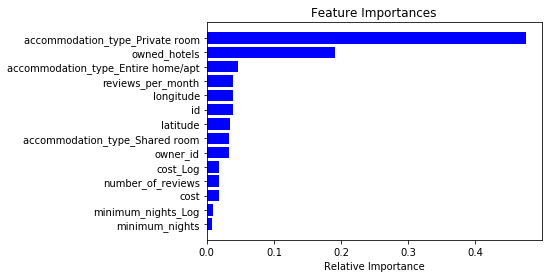

In [22]:
model = RandomForestRegressor(random_state=1)
model.fit(df,data.yearly_availability)
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The addition of the Log features were a good choice since they are more important than their counterparts. 

Last check for feature importance

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


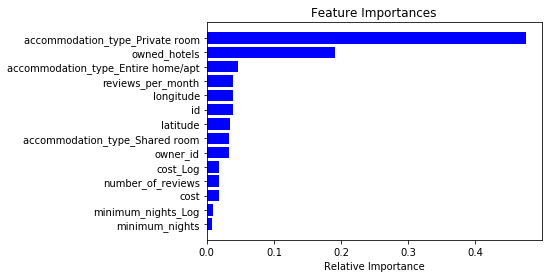

In [23]:
model = RandomForestRegressor(random_state=1)
model.fit(df,data.yearly_availability)
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Starting to split the data and train the model

In [24]:
y = np.array(data.yearly_availability)
x = np.array(df)

Creating the train and test data sets 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

I chose random forest classifier because it is one of the better machine learning algorithms provided by scikit-learn. In addition, it does a good job in classification tasks.

R-squared Error:  0.9250871080139372


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0, 0.5, 'Pred')

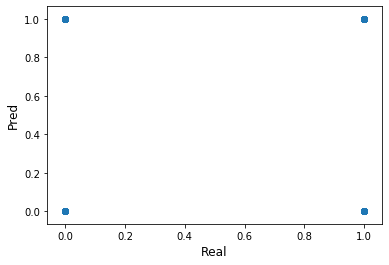

In [26]:
regressor = RandomForestClassifier(random_state=1) #model
regressor.fit(X_train,y_train) #training model
y_pred = regressor.predict(X_test) #predicting results
print('R-squared Error: ',regressor.score(X_test, y_test)) #R square values
plt.figure(0)
plt.scatter(y_test,y_pred)
plt.xlabel('Real', fontsize=12)
plt.ylabel('Pred', fontsize=12)

In [27]:
print(confusion_matrix(y_test,y_pred)) #summary of predicated results
print(classification_report(y_test,y_pred)) #precision, recall, and f1 scores
print(accuracy_score(y_test, y_pred)) # acc value

[[266  25]
 [ 18 265]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       291
           1       0.91      0.94      0.92       283

    accuracy                           0.93       574
   macro avg       0.93      0.93      0.93       574
weighted avg       0.93      0.93      0.93       574

0.9250871080139372


As you can see, I have achieved an accuracy of 92.51% with an f1-score of about 92%.

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [28]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


Preparing test data for model.

In [29]:
test = test_data
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)
test=pd.get_dummies(test) #converts all categorical variables to numeric
test.drop(["region_Bronx","region_Brooklyn","region_Manhattan","region_Queens","region_Staten Island"], axis=1, inplace=True)
test['cost_Log'] = np.log(test['cost'])
test['minimum_nights_Log'] = np.log(test['minimum_nights'])

Running model on test data

In [30]:
test_val = np.array(test)
test_pred = regressor.predict(test_val) #get predictions

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [31]:
submission_df = pd.DataFrame(data={'id': test["id"], 'yearly_availability': test_pred}) #create dataframe

In [32]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---